In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('Datasets/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
434,50.0,NaN,1,50.0,50.0,999.0000,-1.0000
108,38.0,7.8958,0,38.0,38.0,7.8958,7.8958
176,NaN,25.4667,4,99.0,-1.0,25.4667,25.4667
153,40.5,14.5000,2,40.5,40.5,14.5000,14.5000
824,2.0,39.6875,5,2.0,2.0,39.6875,39.6875


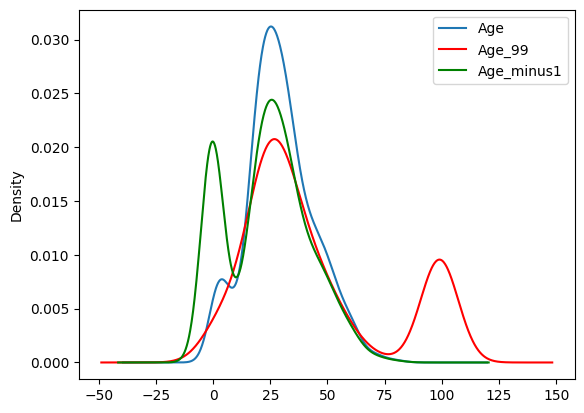

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

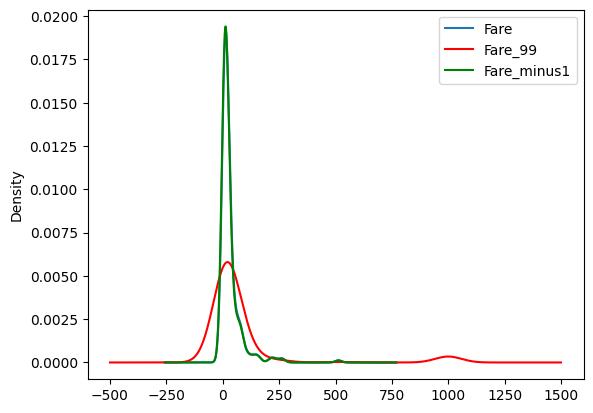

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_99'].plot(kind='kde', ax=ax, color='red')

X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Using Sklearn

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [23]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']), 
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [24]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [25]:
trf.named_transformers_['imputer2'].statistics_

array([999.])